In [41]:
%config InlineBackend.figure_format = 'retina'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import ascii
import pandas as pd
import numpy as np

In [2]:
def vlsr_correction(freq, vlsr):
    """
    freq: the frequency array of spectrum in Hz
    vlsr: the vlsr of source in the unit of km/s
    """
    
    c = 29979245800.0
    return freq + freq*(vlsr*1e5)/c

In [9]:
datadir = '/Users/yaolun/GoogleDrive/research/bhr71_infall/analysis/'
vers = [('imcontsub', '.imcontsub.'), ('pipeline', '.pipeline.'), ('reduced_spectra', '_')]
spws = ['0', '1', '2', '3']
vlsr = -4.45
all_specs = []

ver = vers[0]
for spw in spws:
    spec_dum = ascii.read(datadir+ver[0]+'/spw'+spw+ver[1]+'scriptExtraction.txt')
    spec = pd.DataFrame(spec_dum.as_array())
    spec.columns = spec_dum.meta['comments'][-1].split()
    spec['Freq_corrected'] = vlsr_correction(spec['frequency_(MHz)']/1e3, vlsr)
    all_specs.append(spec)
        

In [10]:
all_specs[0][:5]

,Channel,number_of_unmasked_pixels,frequency_(MHz),Velocity_(km/s),Flux_density_(Jy),Freq_corrected
0,0,347,354396.490000,92.177148,0.022502,354.391229
1,1,347,354396.612072,92.073885,0.001404,354.391352
2,2,347,354396.734144,91.970621,0.003602,354.391474
3,3,347,354396.856216,91.867357,0.044092,354.391596
4,4,347,354396.978288,91.764094,-0.001161,354.391718


## Line IDs from Alyssa

In [42]:
# all magenta line IDs
entries = [('Nitrosyl Cyanide', 345.46157),
           ('Sulfur Dioxide', 345.44898),
           ('Methyl diacetylene', 345.46705),
           ('cis-Glycoaldehyde', 345.4091),
           ('cis-Glycoaldehyde', 345.50392),
           ('Formic Acid', 345.41127),
           ('a-Vinyl Alcohol', 345.54593),
           ('Methyl Formate v=0', 345.45093),
           ('Methyl Formate v=0', 345.46105),
           ('Methyl Formate v=0', 345.46538),
           ('Methyl Formate v=0', 345.48666),
           ('Methyl Formate v=0', 345.50916),
           ('Silicon Carbide', 345.5693),
           ('Ethyl Cyanide v=0', 345.56867),
           ('Ethyl Cyanide', 345.50886),
           ('Formyl Radical', 345.44477),
           ('Vinyl Cyanide v=0', 345.39716),
           ('Vinyl Cyanide v=0', 345.50493),
           ('Acetone', 345.39753),
           ('Acetone', 345.44501),
           ('Acetone', 345.46033),
           ('Vinyl Cyanide', 345.48906),
           ('Vinyl Cyanide', 345.5087),
           ('Aminoacetonitrille', 345.46718),
           ('Methyl Formate', 345.50905),
           ('Methyl Formate', 345.510),
           ('Methyl Formate', 345.57131),
           ('Sulfur Mononitride', 345.13158),
           ('Sulfur Mononitride', 345.15047),
           ('Sulfur Dioxide', 345.13185),
           ('(34)Sulfur Dioxide', 345.28562),
           ('Sulfur Dioxide', 345.14897),
           ('Sulfur Dioxide', 345.33854),
           ('Sulfur Dioxide', 345.33878),
           ('G-Ethylene Glycol', 345.16308),
           ('G-Ethylene Glycol', 345.19574),
           ('G-Ethylene Glycol', 345.2476),
           ('G-Ethylene Glycol', 345.31935),
           ('c-Glycoaldehyde', 345.28232),
           ('c-Glycoaldehyde', 345.32087),
           ('c-Glycoaldehyde', 345.34004),
           ('3-Cyano-1,2-propadienylidene', 345.1632),
           ('(13)Methanol', 345.13262),
           ('Methyl Formate v=0', 345.13278),
           ('Methyl Formate v=0', 345.28144),
           ('(13)Cyclopropenyildene', 345.18319),
           ('Cyanamide', 345.18506),
           ('Cyanamide', 345.28595),
           ('Ethyl Cyanide', 345.29743),
           ('Ethyl Cyanide', 345.30553),
           ('Vinyl Cyanide', 345.15089),
           ('Vinyl Cyanide', 345.23858),
           ('Formic Acid', 345.30557),
           ('Acetone v=0', 345.21064),
           ('Acetone v=0', 345.25604),
           ('Acetone v=0', 345.30537),
           ('Acetone v=0', 345.33969),
           ('Acetic Acid', 345.34005),
           ('G-Ethanol', 345.13262),
           ('G-Ethanol', 345.13333),
           ('G-Ethanol', 345.22925),
           ('G-Ethanol', 345.29536),
           ('Aminoacetonitrille', 345.2583),
           ('Methyl Formate v=1', 345.13188),
           ('Methyl Formate v=1', 345.24821),
           ('Methyl Formate v=1', 345.25589),
           ('Methyl Formate v=1', 345.28129),
           ('Methyl Formate v=1', 345.28603)]
line_ids = {'name': np.array([id[0] for i, id in enumerate(entries)]),
            'frequency': np.array([id[1] for i, id in enumerate(entries)])}

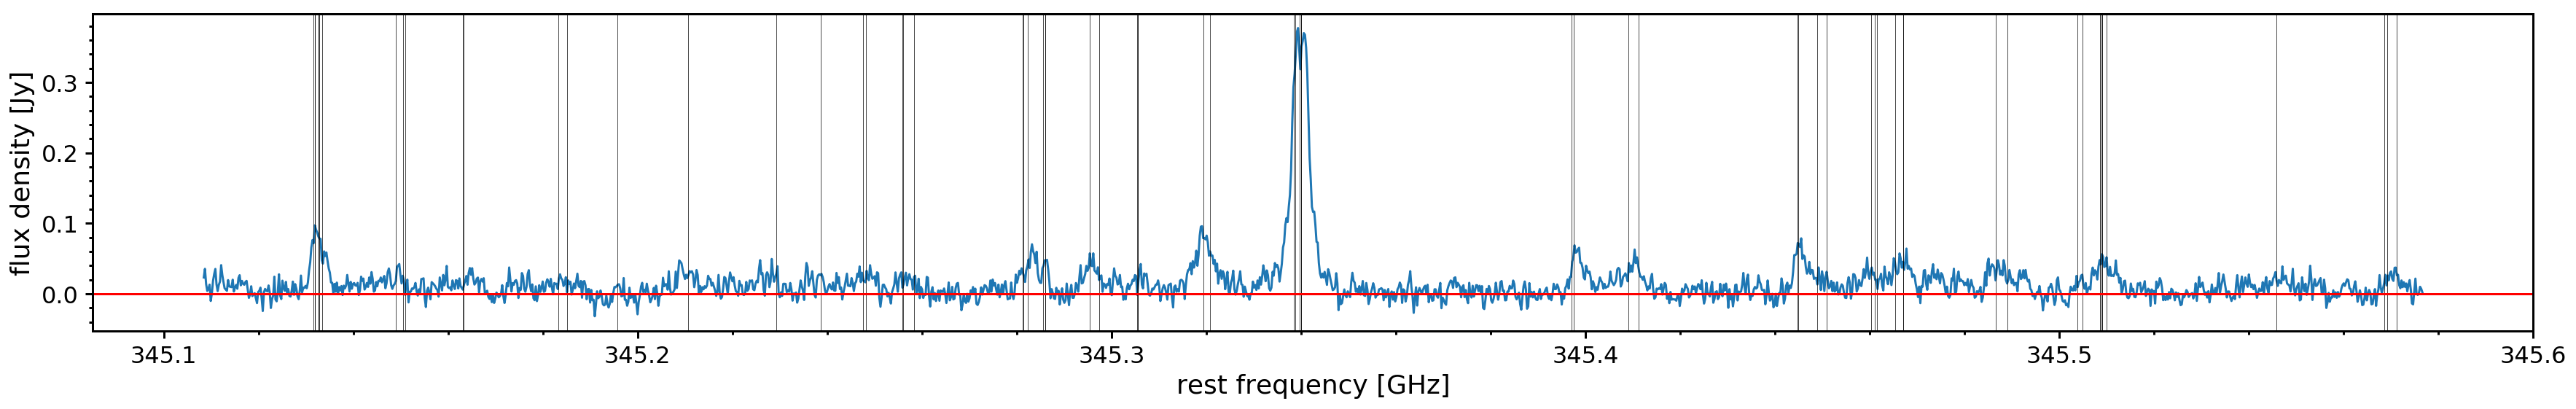

In [61]:
fig = plt.figure(figsize=(30,4))
ax = fig.add_subplot(111)

ax.plot(all_specs[3]['Freq_corrected'], all_specs[3]['Flux_density_(Jy)'])

for i, (n, f) in enumerate(zip(line_ids['name'], line_ids['frequency'])):
    ax.axvline(f, color='k', linewidth=0.5, alpha=0.7)

ax.axhline(0, color='r')
ax.set_xlabel('rest frequency [GHz]', fontsize=18)
ax.set_ylabel('flux density [Jy]', fontsize=18)
ax.tick_params('both',labelsize=16,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=16,width=1.5,which='minor',pad=5,length=2.5)

[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()

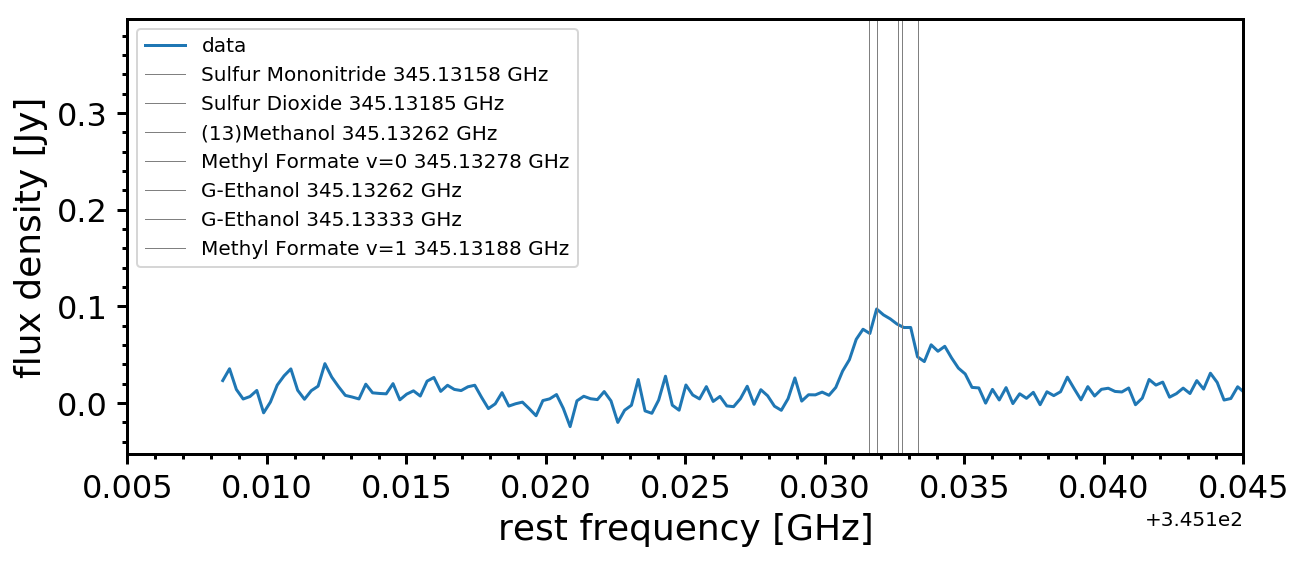

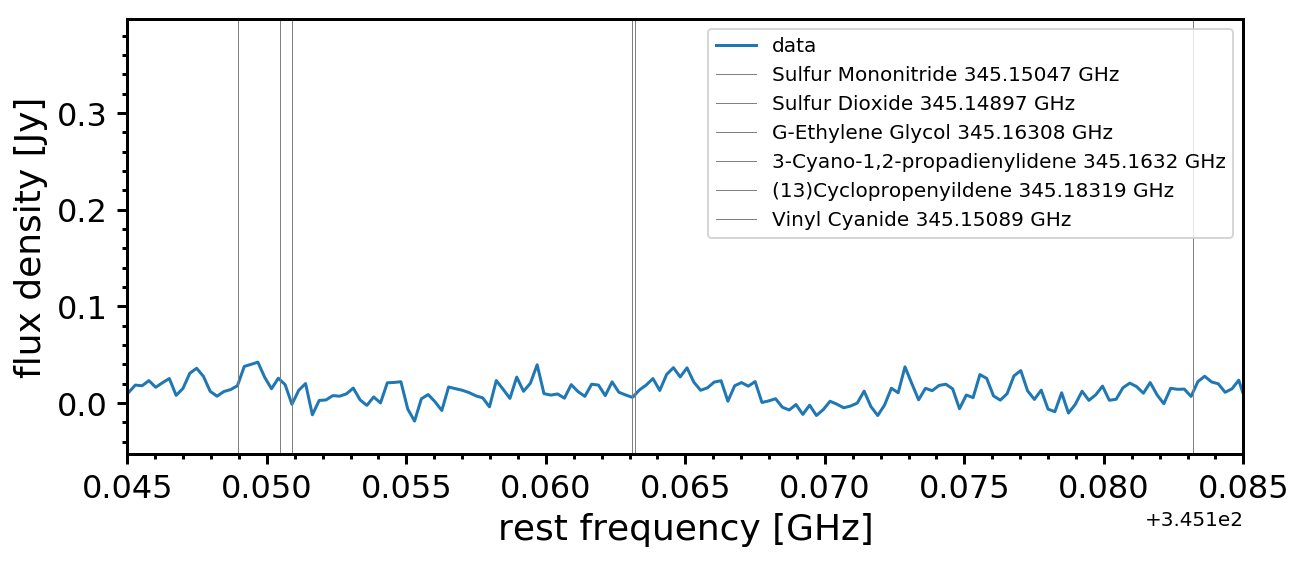

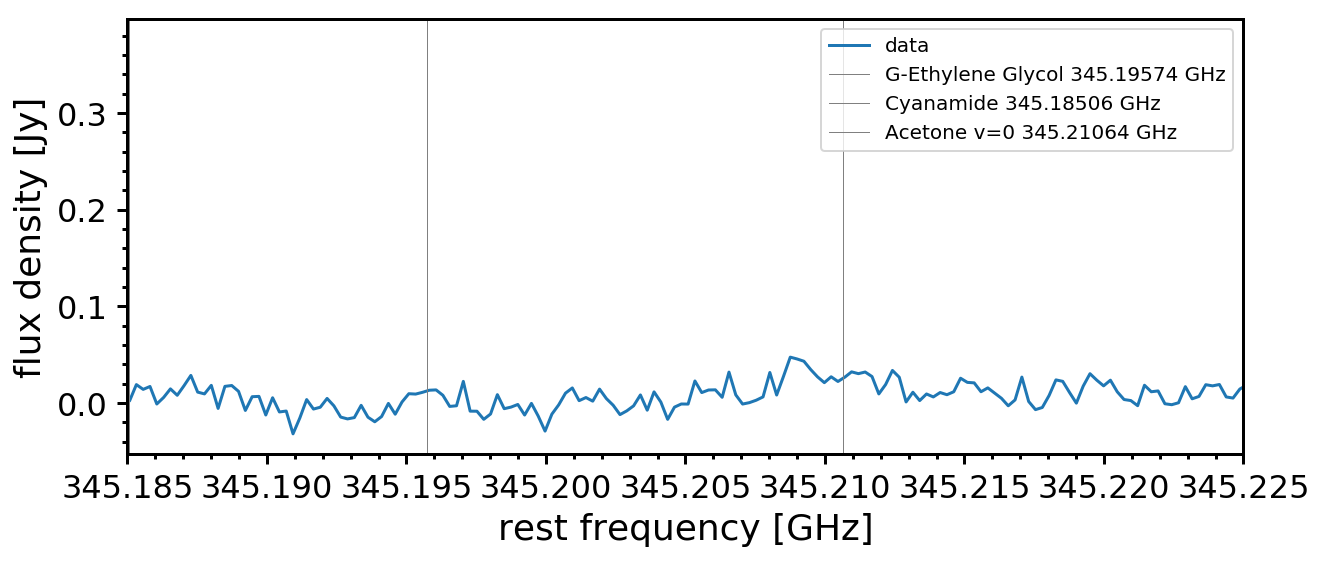

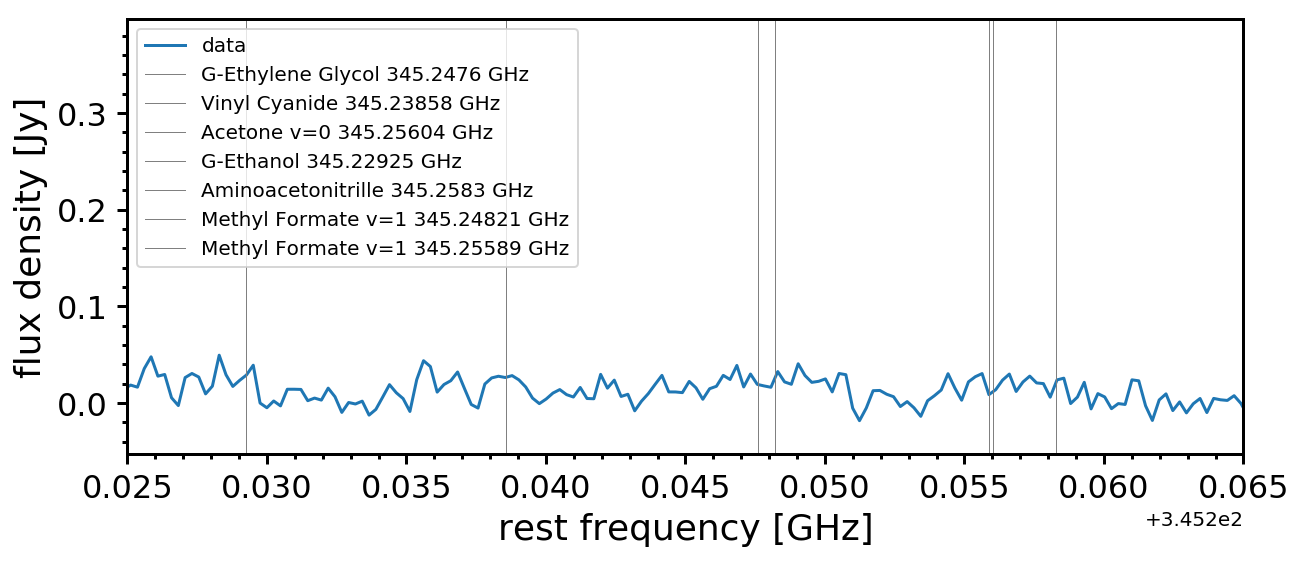

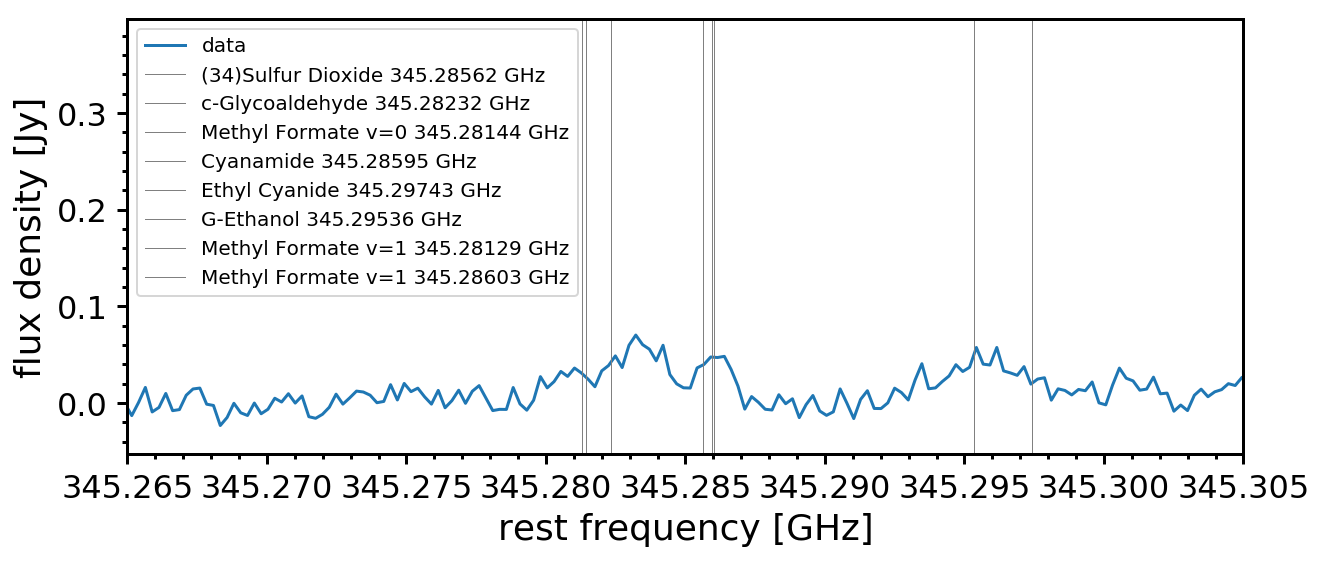

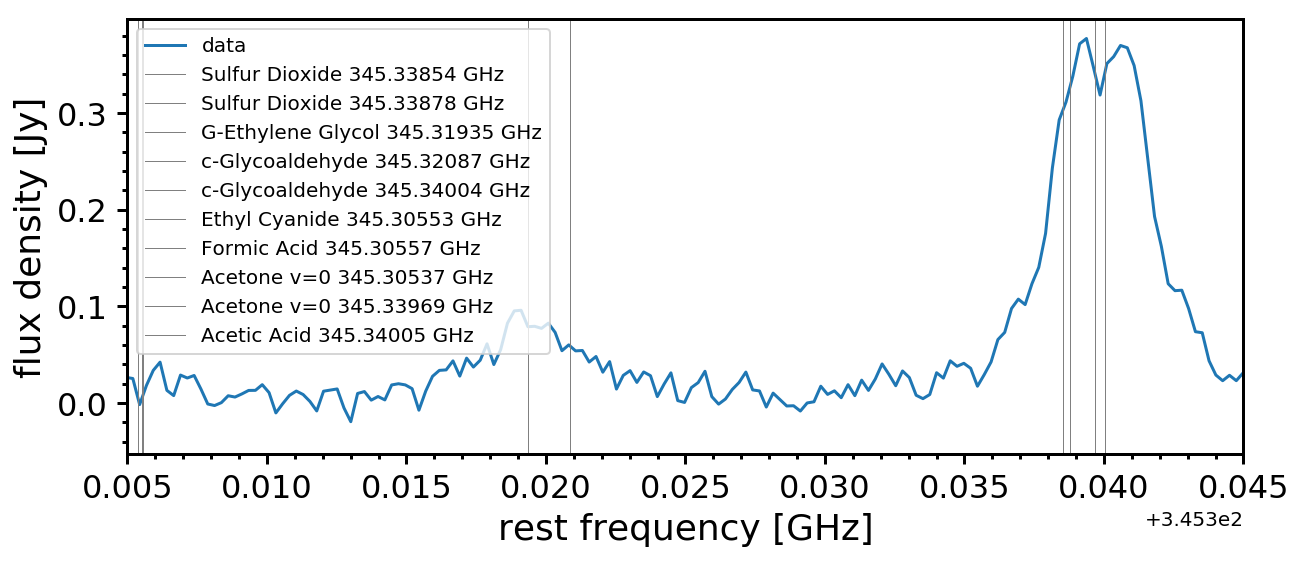

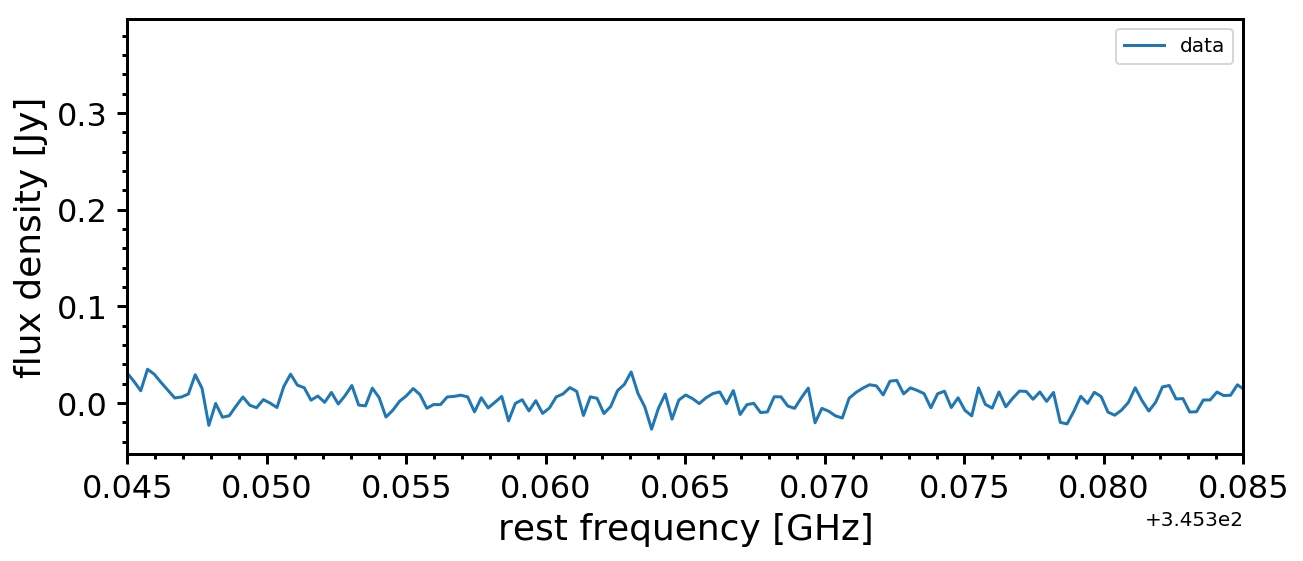

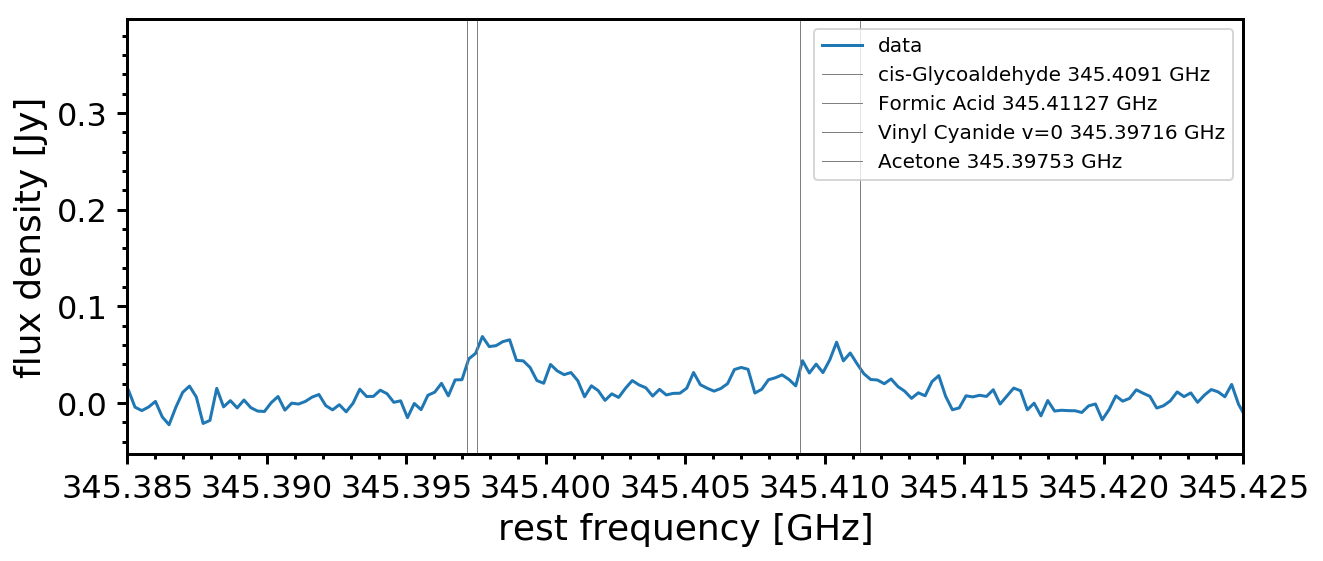

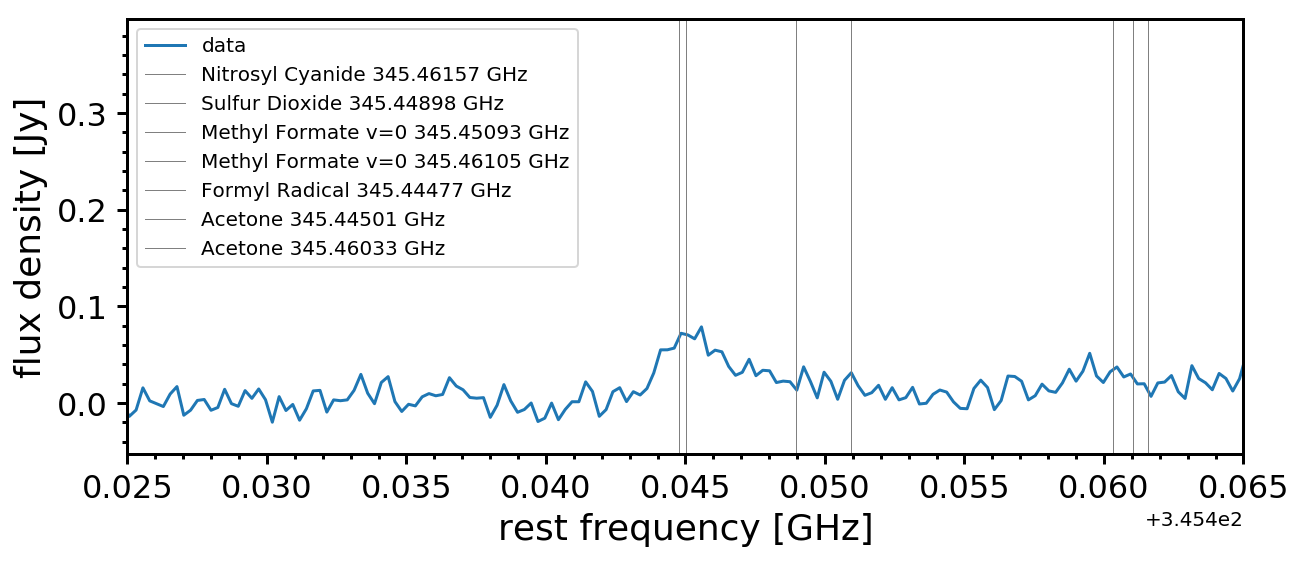

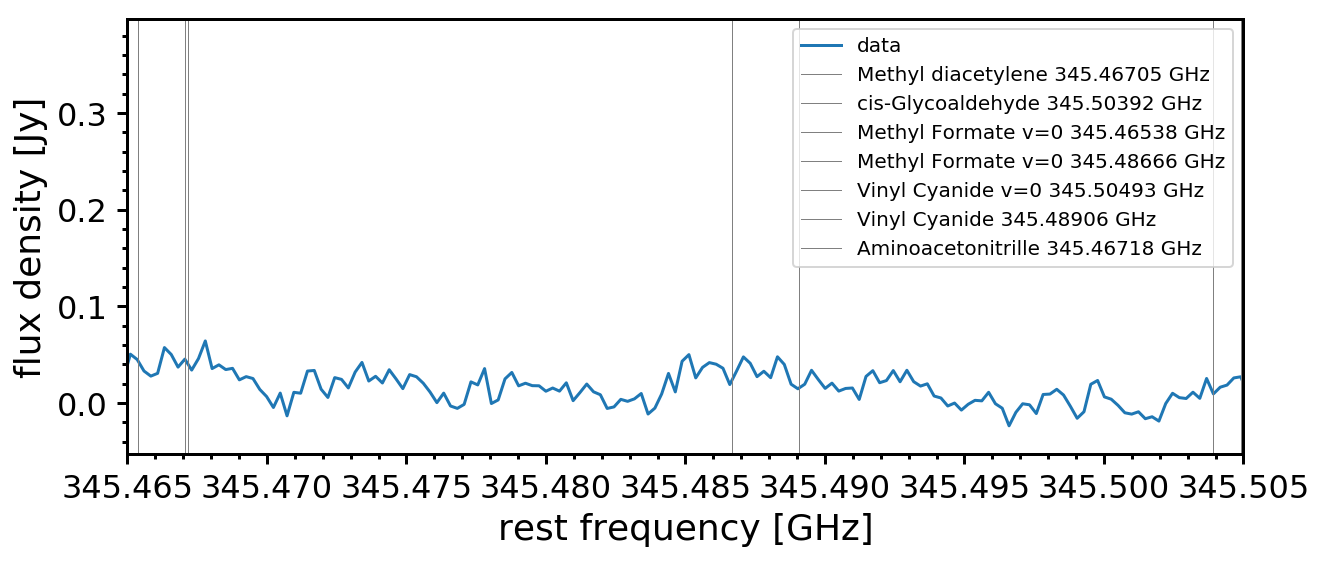

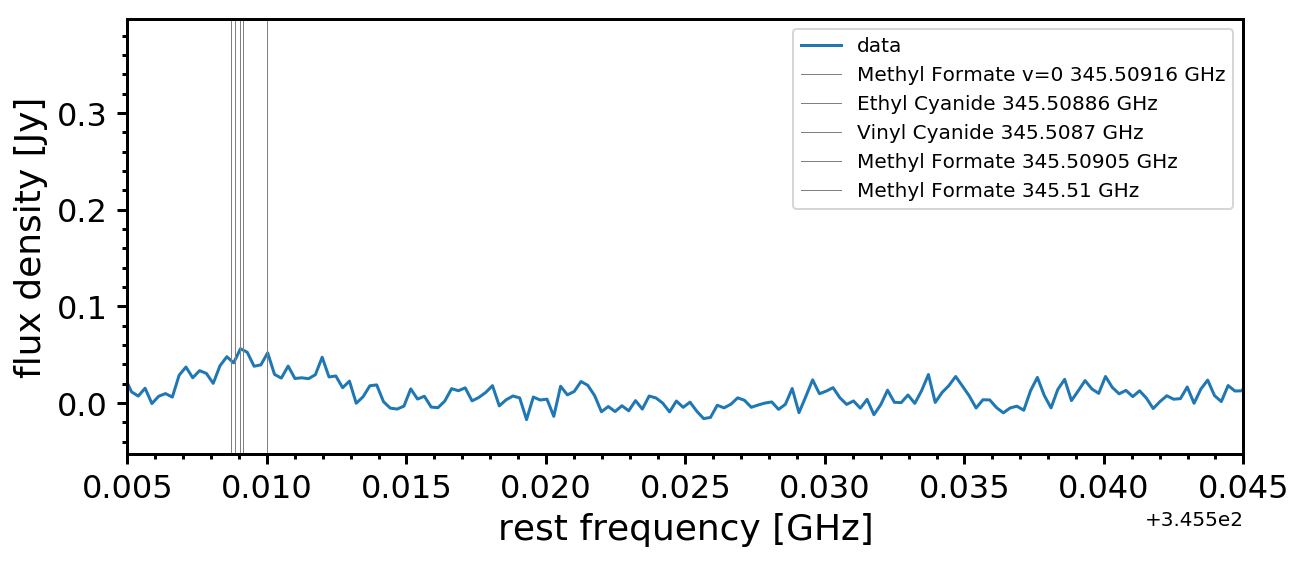

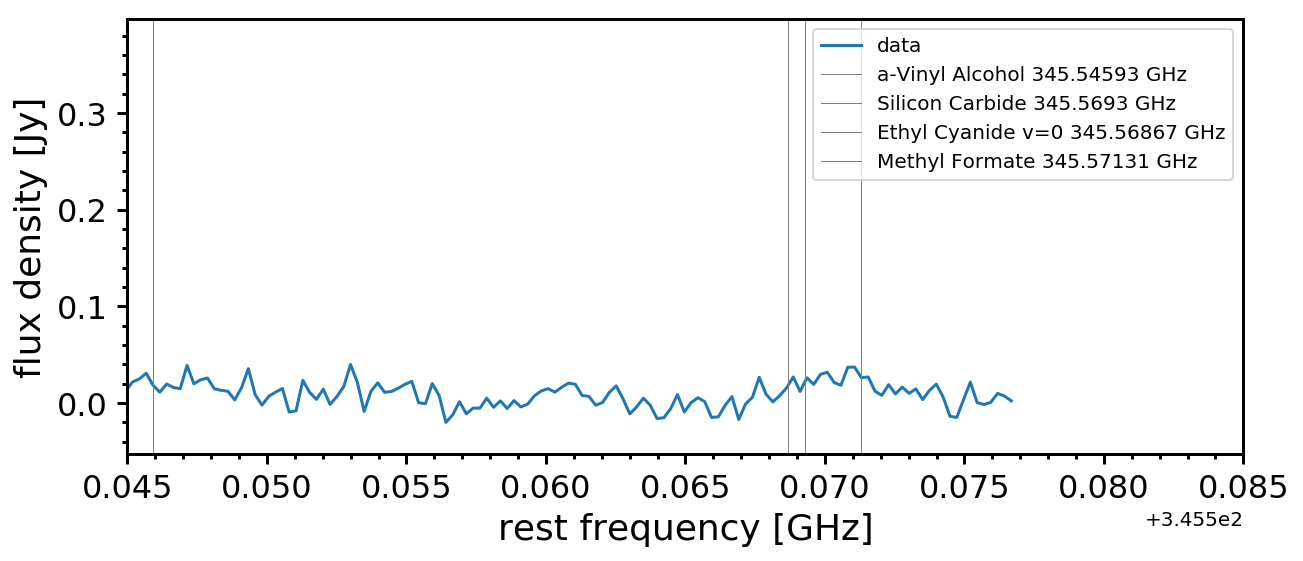

In [57]:
bounds = [[345.105+i*0.04, 345.105+(i+1)*0.04] for i in range(12)]

for bound in bounds:
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(111)

    ax.plot(all_specs[3]['Freq_corrected'], all_specs[3]['Flux_density_(Jy)'], label='data')
    selector = (line_ids['frequency'] <= bound[1]) & (line_ids['frequency'] >= bound[0])
    for i, (n, f) in enumerate(zip(line_ids['name'][selector], line_ids['frequency'][selector])):
        ax.axvline(f, color='Gray', linewidth=0.5, label=n+' '+str(f)+' GHz')
#             t = ax.text(id[1], 0.4, id[0], rotation='vertical', va='top')

    ax.legend(loc='best')
    ax.set_xlim(bound)
    ax.set_xlabel('rest frequency [GHz]', fontsize=18)
    ax.set_ylabel('flux density [Jy]', fontsize=18)
    ax.tick_params('both',labelsize=16,width=1.5,which='major',pad=5,length=5)
    ax.tick_params('both',labelsize=16,width=1.5,which='minor',pad=5,length=2.5)

    [ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
    ax.minorticks_on()
